# Линейная регрессия


Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ \hat{y} = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где $\hat{y}$ - целевая переменная (что мы хотим предсказать), $x_i$ - i-ый признак объекта $x$, $w_i$ - вес $i$-го признака, $b$ - bias (смещение, свободный член).

В задаче линейной регрессии $\hat{y}$ - это действительное число.

Часто для упрощения записи вводят дополнительный фиктивный признак $x_0$, который всегда равен 1, тогда bias - вес этого признака. В этом случае формула может быть записана как скалярное произведение:
$$ \hat{y} = <w, x> $$

В матричной форме формулу можно переписать следующим образом:
$$ \hat{y} = Xw,$$
$\hat{y}$ - вектор значений целевой переменной размера $n$, $X$ - матрица значений признаков объектов размера $n \times k$, w - вектор весов размера $k$. То есть в наших данных имеется $n$ объектов, каждый их которых описан $k$ признаками.

Таким образом, в матричной форме модель задаётся следующим образом:
$$ y = Xw + \epsilon$$

Важно отметить, что параметрами этой модели являются веса $w$. Когда говорят об обучении какого-либо алгоритма машинного обучения, как правило, имеют в виду настройку весов, т.е. параметров модели.  

На практике $\hat{y} $ может отличается от реальных значений, которые принимает целевая переменная $y$. Разницу между реальным значением и предсказанным, обозначим как $\epsilon$ - вектор значений случайной переменной, соответствующая случайной, непрогнозируемой ошибке модели. Ограничения, которые накладываются на эту модель:
* математическое ожидание случайных ошибок $\epsilon$ равно нулю,
* дисперсия случайных ошибок одинакова и конечна,
* случайные ошибки не скоррелированы.

Один из способов вычислить значения параметров модели, давно знаком - это наименьших квадратов, который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью. Решение по методу наименьших квадратов дает:
$$ w = (X^TX)^{-1}X^TY $$

Загрузим необходимые библиотеки

In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
plt.style.use('ggplot')
%matplotlib inline

## Оценка результатов

Чтобы оценить качество работы алгоритма нам необходимо применяют разные метрики. Наиболее частые метрики средневадратичная и средняя абсолютная ошибки. Вычислим эти метрики на обучающей и на тестовой выборках.

 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$

## Задание 3.1

Пример 1. Сгенерируем искусственные данные. Сначала поработаем с простейшим одномерным случаем, когда у нас значение $y$ будет зависеть только от одного значения $x$.




In [32]:
def generate_data(n_points=20):
  """
    Принимает на вход n_points точек
    Возвращает данные для обучения и теста
  """
  X = np.linspace(-5, 5, n_points)
  y = 10 * X - 7

  X_train = X[0::2].reshape(-1, 1)
  y_train = y[0::2] + np.random.randn(int(n_points/2)) * 10

  X_test = X[1::2].reshape(-1, 1)
  y_test = y[1::2] + np.random.randn(int(n_points/2)) * 10

  print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
  return X, X_train, y_train, X_test, y_test

In [33]:
X, X_train, y_train, X_test, y_test = generate_data(100)

Generated 50 train samples and 50 test samples


In [34]:
### Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

def least_squares_method(X_test, y_test):
    X_bias = np.concatenate([X_test, np.ones((X_test.shape[0], 1))], axis=1)
    result = np.dot(np.dot(np.linalg.matrix_power(np.dot(np.transpose(X_bias), X_bias), -1), np.transpose(X_bias)), y_test)
    return result[:-1], result[-1]

w, b = least_squares_method(X_train, y_train)

In [35]:
def MAE(y, y_predicted):
  return np.mean(np.abs(y - y_predicted))

def MSE(y, y_predicted):
  return np.mean(np.power(y - y_predicted, 2))

print(f'w = {w[0]}, b = {b}')
mae = MAE(y_test, np.dot(X_test, w) + b)
mse = MSE(y_test, np.dot(X_test, w) + b)
print(f'MAE: {mae}, MSE: {mse}')

w = 9.44575730000674, b = -8.504398108916616
MAE: 8.773262349124588, MSE: 122.58562039371537


In [36]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
sklearn_w = linear_model.coef_[0]
sklearn_b = linear_model.intercept_
sklearn_mae = mean_absolute_error(y_test, linear_model.predict(X_test))
sklearn_mse = mean_squared_error(y_test, linear_model.predict(X_test))
print(f'sklearn w = {sklearn_w}, sklearn b = {sklearn_b}')
print(f'sklearn mae: {sklearn_mae}, sklearn mse: {sklearn_mse}')

sklearn w = 9.445757300006738, sklearn b = -8.504398108916618
sklearn mae: 8.773262349124591, sklearn mse: 122.58562039371535


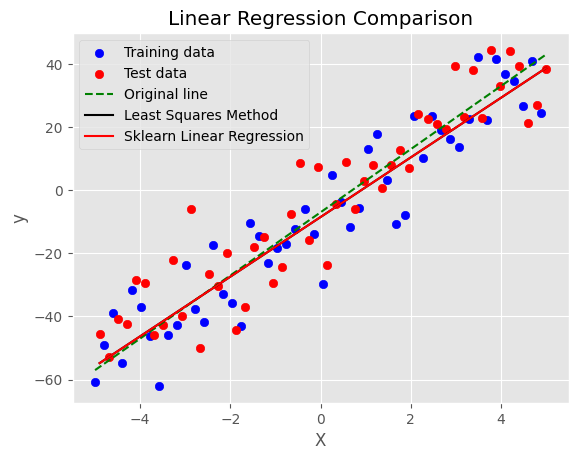

In [37]:
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(X, 10 * X - 7, 'g--', label='Original line')
plt.plot(X_test, np.dot(X_test, w[0]) + b, 'k-', label='Least Squares Method')
plt.plot(X_test, linear_model.predict(X_test), 'r-', label='Sklearn Linear Regression')
plt.legend()
plt.title('Linear Regression Comparison')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Задание 3.2

Пример 2. Не всегда в задаче регрессии в качестве решения выступает прямая, как в предыдущем случае. Рассмотрим ещё один пример, в котором у объектов всё ещё один признак. Но теперь мы будм брать случайную точку на синусоиде и добавлять к ней шум — таким образом получим целевую переменную, признаком в этом случае будет координата $x$.

In [38]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # выберем некоторое количество точек из промежутка от 0 до 2*pi
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # для каждой посчитаем значение sin(x) + 1
    # это будет ground truth
    data['values'] = np.sin(data['support']) + 1
    # из support посемплируем некоторое количество точек с возвратом, это будут признаки
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # опять посчитаем sin(x) + 1 и добавим шум, получим целевую переменную
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

data = generate_wave_set(1000, 250)

In [39]:
### попробуйте реализовать настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
### Найдите значения метрик MSE и MAE
x_train2 = data['x_train'].reshape(-1, 1)
y_train2 = data['y_train']
w2, b2 = least_squares_method(x_train2, y_train2)
y_values = data['values']
x_values = data['support']
print(f'w = {w2}, b = {b2}')
print(f'MAE: {MAE(y_train2, np.dot(x_train2, w2[0]) + b2)}, MSE: {MSE(y_train2, np.dot(x_train2, w2[0]) + b2)}')

w = [-0.28389645], b = 1.9299456880385948
MAE: 0.7475372697838293, MSE: 0.829866668794747


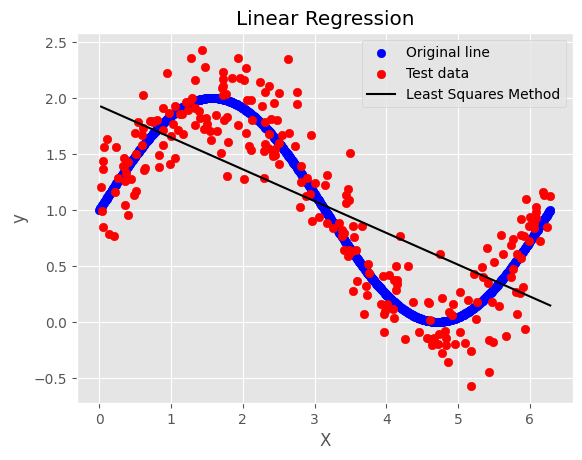

In [40]:
plt.scatter(x_values, y_values, color='blue', label='Original line')
plt.scatter(x_train2, y_train2, color='red', label='Test data')
plt.plot(x_train2, np.dot(x_train2, w2[0]) + b2, 'k-', label='Least Squares Method')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Конечно, такое решение нас вряд ли может устроить. Нужно применить полинимиальную регрессию. Идея здесь такая. Каждый признак в исходную формулу может входить не только в первой степени, но и во второй, в третьей и так далее. То есть для случая, когда у нас только один признак:
$$ \widehat{y} = w_1 x_1 + w_2 x_1^2 + ... + w_k x_1^k + b,$$

## Задание 3.3

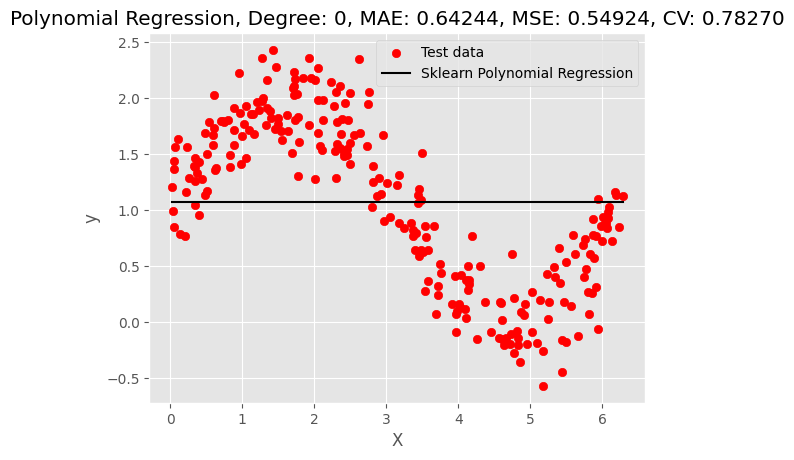

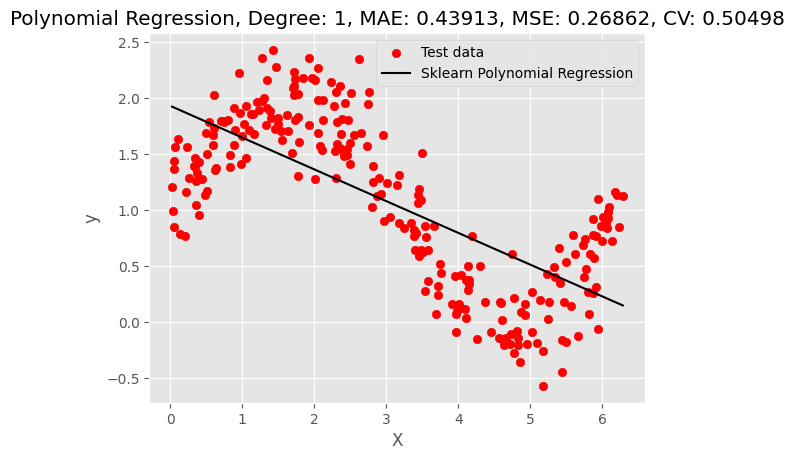

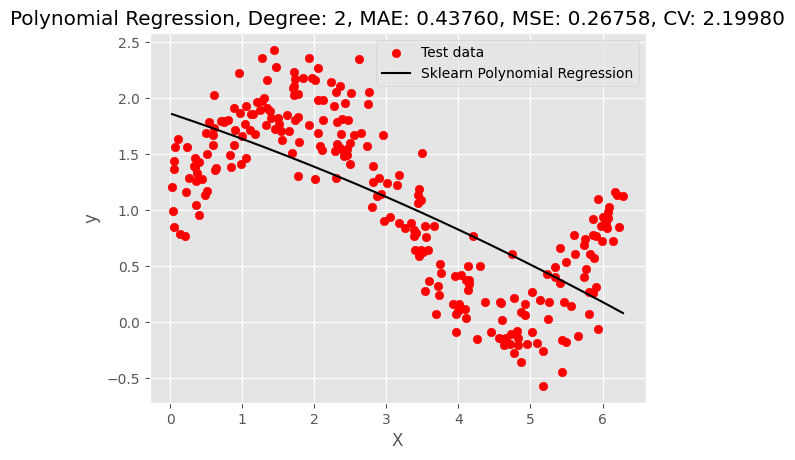

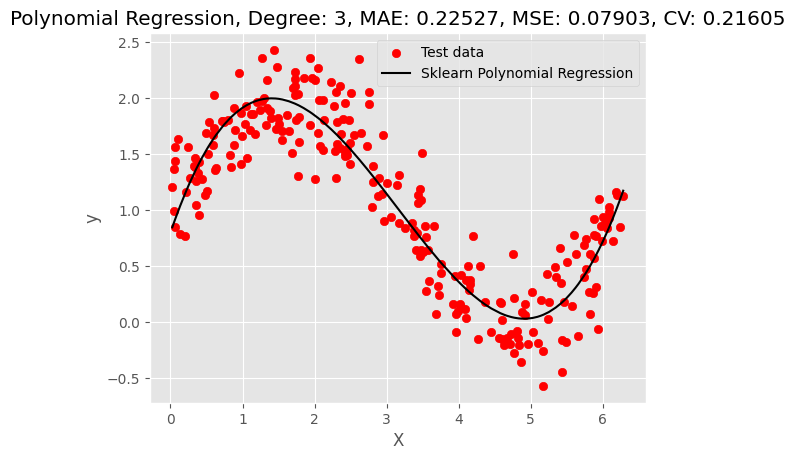

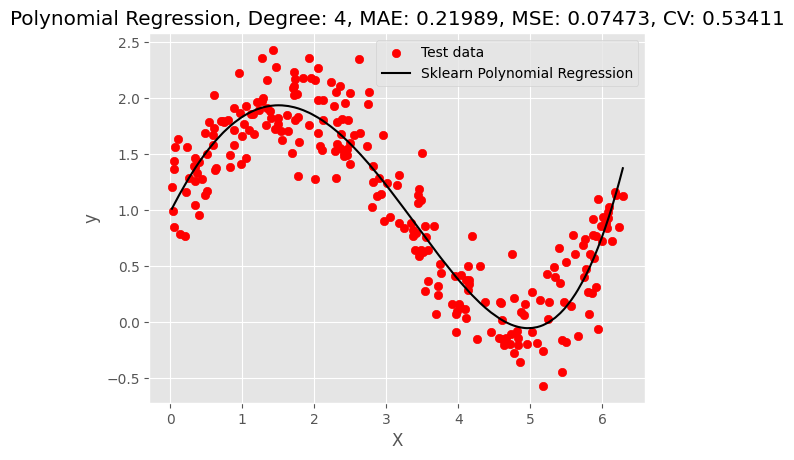

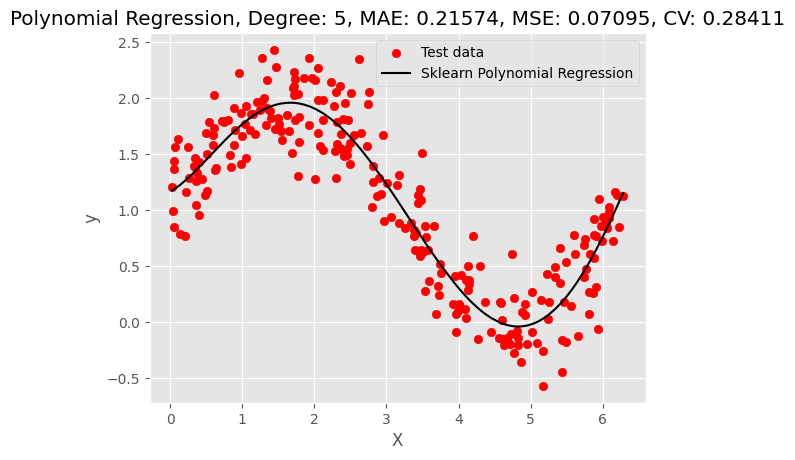

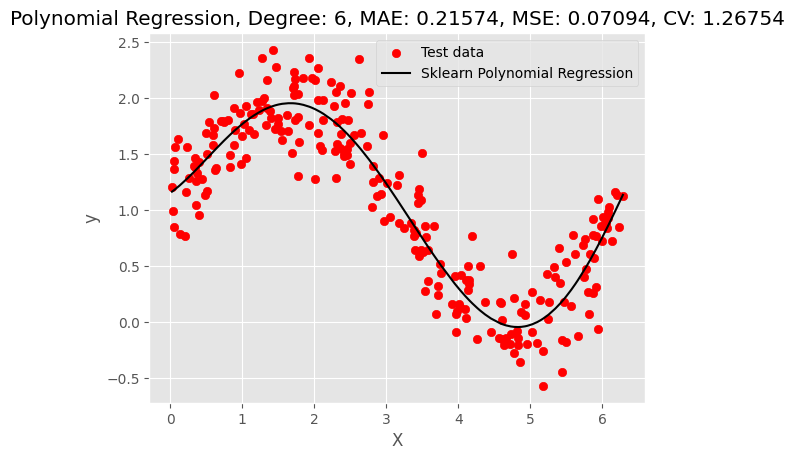

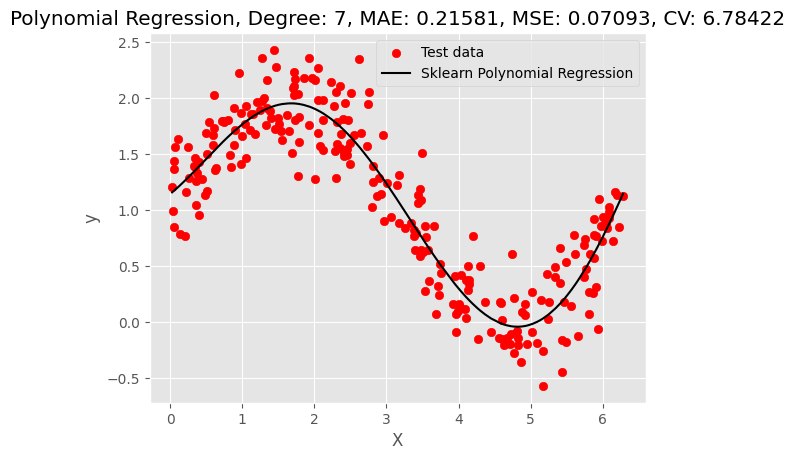

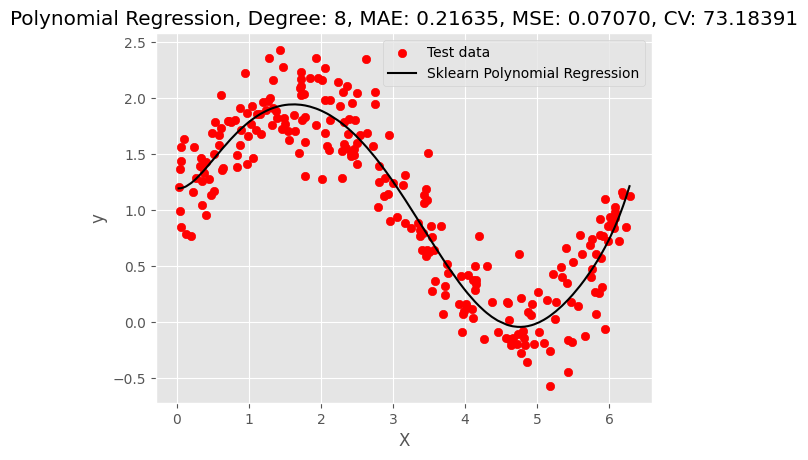

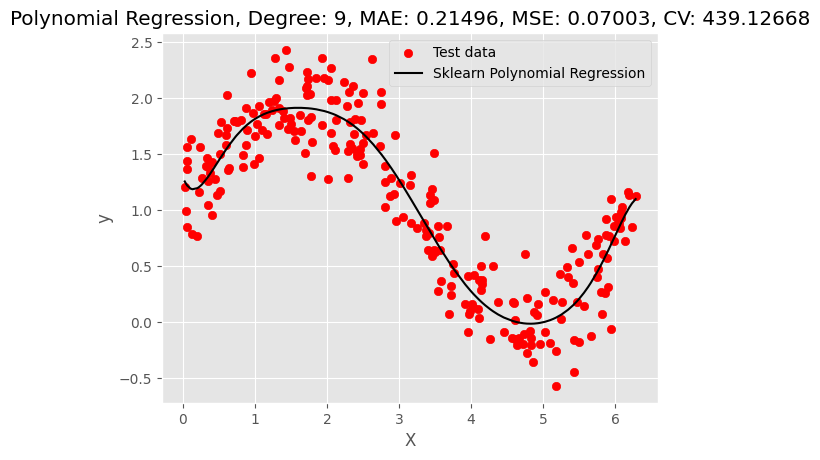

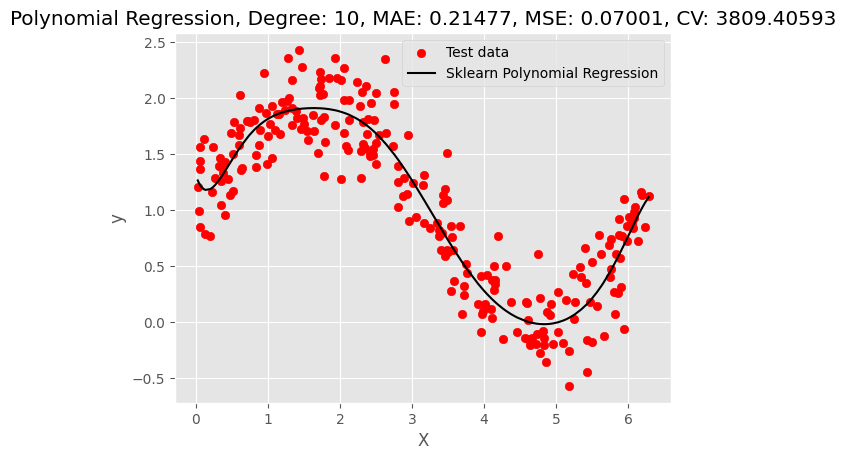

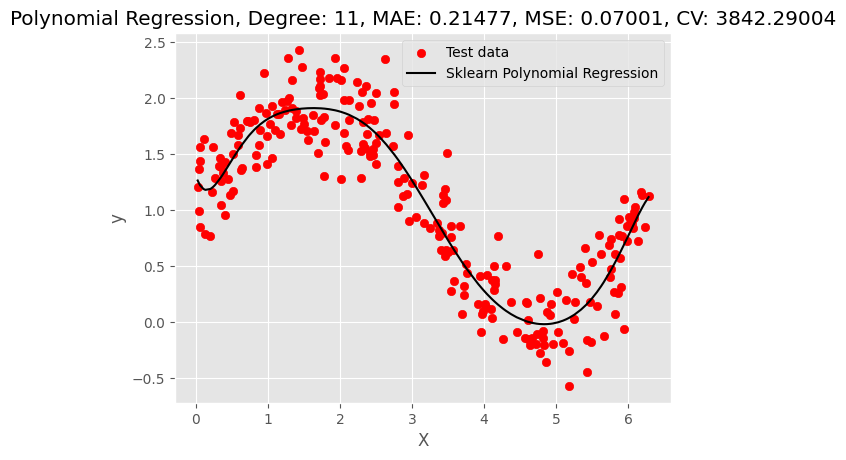

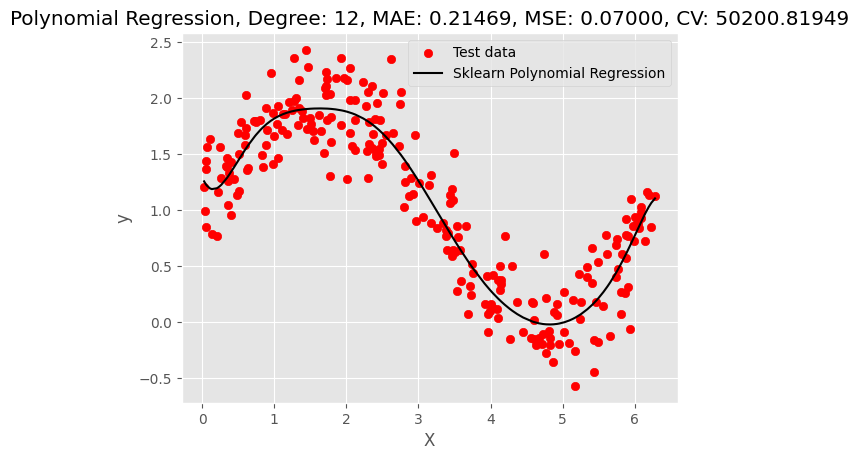

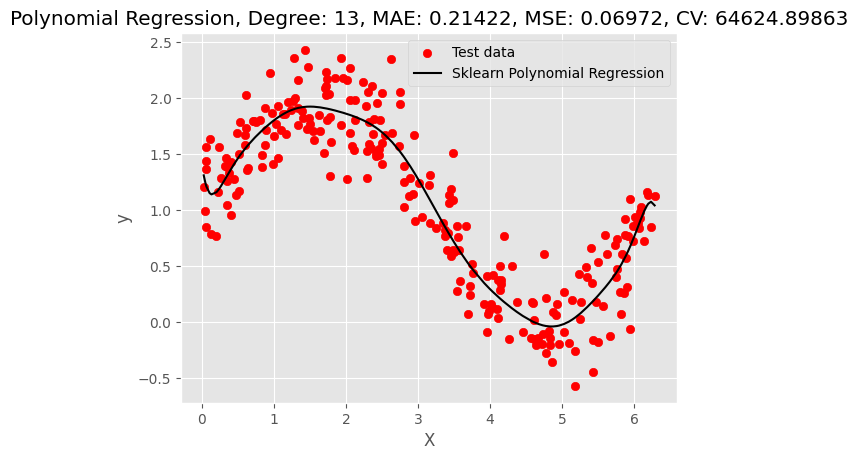

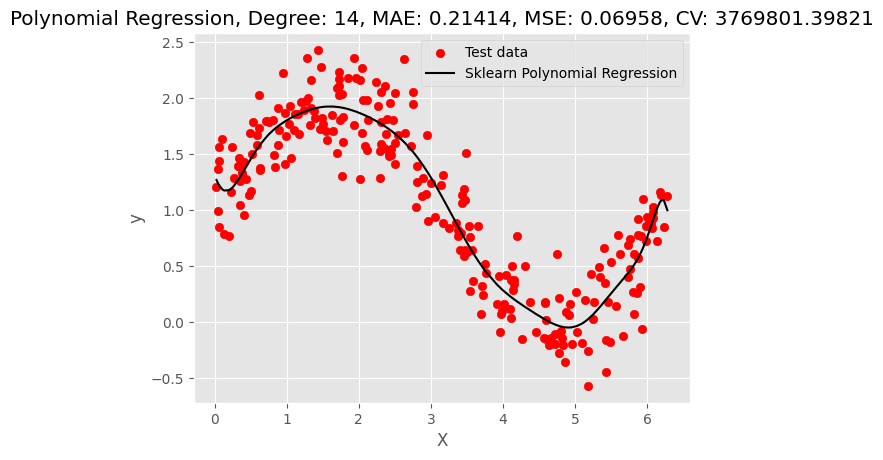

Best polynom with cv: 0.21604583057954288, degree: 3


In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

### Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней.
### Полином какой степени подходит больше других? Почему?

def polynomial_regression(degree, x_train, y_train):
  polynomialModel = PolynomialFeatures(degree=degree)
  x_polynomial = polynomialModel.fit_transform(x_train)
  linear_model.fit(x_polynomial, y_train)
  y_polynomial = linear_model.predict(x_polynomial)

  cv_score = -cross_val_score(linear_model, x_polynomial, y_train, cv=5, scoring='neg_mean_squared_error').mean()

  plt.scatter(x_train, y_train, color='red', label='Test data')
  plt.plot(x_train, y_polynomial, 'k-', label='Sklearn Polynomial Regression')
  plt.legend()
  plt.title(f'Polynomial Regression, Degree: {i}, MAE: {MAE(y_train, y_polynomial):.5f}, MSE: {MSE(y_train, y_polynomial):.5f}, CV: {cv_score:.5f}')
  plt.xlabel('X')
  plt.ylabel('y')
  plt.show()

  return cv_score
scores = []

for i in range(15):
  scores.append(polynomial_regression(i, data['x_train'].reshape(-1, 1), data['y_train']))

print(f'Best polynom with cv: {min(scores)}, degree: {scores.index(min(scores))}')


# Реальный датасет

Возьмём реальный набор данных Boston из sklearn.datasets. Этот датасет описывает средние цены на недвижимость в районах Бостона в тысячах долларов.

Примеры признаков объектов недвижимости: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д. Обратите внимание на то, что данные уже оцифрованы там, где изначально признаки были качественными.

Загрузим датасет, выведем информацию

Возьмите датасет отсюда: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices/

In [42]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv('/content/drive/MyDrive/data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston

Mounted at /content/drive


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Задание 3.4

In [43]:
### оставьте в наборе данных только 7 наиболее значимых признаков
### настройте параметры линейной регрессии и сравните метрики качества (MSE и MAE) для полного датасета и усечённого
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_train_predicted = linear_model.predict(X_train_scaled)
y_test_predicted = linear_model.predict(X_test_scaled)
w = linear_model.coef_
mse_test = mean_squared_error(y_test, y_test_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)

mse_train = mean_squared_error(y_train, y_train_predicted)
mae_train = mean_absolute_error(y_train, y_train_predicted)

print(f'MAE test: {mae_test}, MSE test: {mse_test}')
print(f'MAE train: {mae_train}, MSE train: {mse_train}')

MAE test: 3.1627098714574053, MSE test: 21.51744423117721
MAE train: 3.3568267821682065, MSE train: 22.545481487421423


In [44]:
important_features = np.abs(w)
important_indexes = np.argsort(important_features)[7:]

important_features_columns = X.columns[important_indexes]

X_train_new = X_train[important_features_columns]
X_test_new = X_test[important_features_columns]

X_train_new_scaled = scaler.fit_transform(X_train_new)
X_test_new_scaled = scaler.transform(X_test_new)

linear_model.fit(X_train_new_scaled, y_train)
y_train_predicted_new = linear_model.predict(X_train_new_scaled)
y_test_predicted_new = linear_model.predict(X_test_new_scaled)

mse_test_new = mean_squared_error(y_test, y_test_predicted_new)
mae_test_new = mean_absolute_error(y_test, y_test_predicted_new)

mse_train_new = mean_squared_error(y_train, y_train_predicted_new)
mae_train_new = mean_absolute_error(y_train, y_train_predicted_new)
print("Top 7 features")
print(f'MAE test: {mae_test_new}, MSE test: {mse_test_new}')
print(f'MAE train: {mae_train_new}, MSE train: {mse_train_new}')


Top 7 features
MAE test: 3.3061402905161827, MSE test: 22.4913746478453
MAE train: 3.5940983502637383, MSE train: 25.560597269249325
